In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from docopt import docopt

In [219]:
mushrooms = pd.read_csv("../data/raw/mushrooms.csv")

In [220]:
mushrooms["class"] = [1 if i == "p" else 0 for i in mushrooms["class"]]

In [224]:
mushrooms

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [225]:
train_df, test_df = train_test_split(mushrooms, test_size=0.2, random_state=123)

In [226]:
train_df["class"].value_counts(normalize=True)

0    0.514695
1    0.485305
Name: class, dtype: float64

In [227]:
X_train = train_df.drop(columns=["class"])
X_test = test_df.drop(columns=["class"])

y_train = train_df["class"]
y_test = test_df["class"]

In [176]:
train_df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
3930,p,f,y,g,f,f,f,c,b,h,...,k,p,b,p,w,o,l,h,y,p
2252,e,f,f,g,f,n,f,w,b,h,...,f,w,w,p,w,o,e,n,s,g
7720,e,b,s,g,f,n,f,w,b,w,...,k,w,w,p,w,t,p,w,s,g
1941,e,f,f,n,t,n,f,c,b,n,...,s,g,p,p,w,o,p,k,v,d
1538,e,x,s,g,f,n,f,w,b,p,...,f,w,w,p,w,o,e,n,s,g


In [222]:
mushrooms.columns = ["class",
            "cap_shape",
            "cap_surface",
            "cap_color",
            "bruises",
            "odor",
            "gill_attachment",
            "gill_spacing",
            "gill_size",
            "gill_color",
            "stalk_shape",
            "stalk_root",
            "stalk_surface_above_ring",
            "stalk_surface_below_ring",
            "stalk_color_above_ring",
            "stalk_color_below_ring",
            "veil_type",
            "veil_color",
            "ring_number",
            "ring_type",
            "spore_print_color",
            "population",
            "habitat"]

In [177]:
categorical_features = [
            "cap_shape",
            "cap_surface",
            "cap_color",
            "odor",
            "gill_attachment",
            "gill_spacing",
            "gill_size",
            "gill_color",
            "stalk_shape",
            "stalk_root",
            "stalk_surface_above_ring",
            "stalk_surface_below_ring",
            "stalk_color_above_ring",
            "stalk_color_below_ring",
            "veil_color",
            "ring_number",
            "ring_type",
            "spore_print_color",
            "population",
            "habitat"]
binary_features = ["bruises"] #binary
drop_features = ["veil_type"] #only one class

In [287]:
X_train

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
3930,f,y,g,f,f,f,c,b,h,e,...,k,p,b,p,w,o,l,h,y,p
2252,f,f,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
7720,b,s,g,f,n,f,w,b,w,e,...,k,w,w,p,w,t,p,w,s,g
1941,f,f,n,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,k,v,d
1538,x,s,g,f,n,f,w,b,p,t,...,f,w,w,p,w,o,e,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,x,y,y,f,f,f,c,b,h,e,...,k,b,b,p,w,o,l,h,v,g
1346,f,y,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,n,v,g
3454,x,f,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,s,d
7533,x,s,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,p


In [223]:
mushrooms = mushrooms.replace('?', np.nan)

In [36]:
mushrooms['stalk_root'].isnull().any()

True

In [56]:
mushrooms = mushrooms.replace({'bruises': {True:'yes', 
                                False:'no'}})

In [178]:
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

binary_transformer = make_pipeline(
    OneHotEncoder(drop="if_binary", dtype=int),
)


preprocessor = make_column_transformer(
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

In [161]:
preprocessor.named_transformers_

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [79]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['bruises']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['cap_shape', 'cap_surface', 'cap_color',
                                  'odor', 'gill_attachment', 'gill_s

In [81]:
column_names = binary_features + list(
        preprocessor.named_transformers_['pipeline-2']["onehotencoder"].get_feature_names_out(
            categorical_features
        )
    )

In [84]:
preprocessed_df = pd.DataFrame(preprocessor.fit_transform(X_train, y_train), columns = column_names)

In [85]:
preprocessed_df

,bruises,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6495,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6496,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
import joblib

In [162]:
preprocessor.fit_transform(X_train, y_train)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [163]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['bruises']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['cap_shape', 'cap_surface', 'cap_color',
                                  'odor', 'gill_attachment', 'gill_s

In [288]:
#joblib.dump(preprocessor, '../data/processed/preprocessor.pkl')
 
# Load the model from the file
preprocessor_from_j = joblib.load('../data/processed/preprocessor.pkl')
 
# Use the loaded model to make predictions
#knn_from_joblib.predict(X_test)

In [290]:
preprocessor_from_j.fit_transform(X_train,y_train)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [291]:
X_train

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
3930,f,y,g,f,f,f,c,b,h,e,...,k,p,b,p,w,o,l,h,y,p
2252,f,f,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
7720,b,s,g,f,n,f,w,b,w,e,...,k,w,w,p,w,t,p,w,s,g
1941,f,f,n,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,k,v,d
1538,x,s,g,f,n,f,w,b,p,t,...,f,w,w,p,w,o,e,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,x,y,y,f,f,f,c,b,h,e,...,k,b,b,p,w,o,l,h,v,g
1346,f,y,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,n,v,g
3454,x,f,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,s,d
7533,x,s,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,p


In [231]:
from sklearn.model_selection import cross_val_predict

confusion_matrix(y_train, cross_val_predict(pipe_svc, X_train, y_train))

array([[3345,    0],
       [   0, 3154]])

In [239]:
lr_matrix = confusion_matrix(y_train, cross_val_predict(pipe_lr, X_train, y_train))

In [241]:
lr_matrix_df = pd.DataFrame(data=lr_matrix)

In [248]:
lr_matrix_df

,edible,poisonous
edible,3345,0
poisonous,2,3152


In [247]:
lr_matrix_df = lr_matrix_df.rename(columns={0:'edible', 1:'poisonous'}, index={0:'edible', 1:'poisonous'})

In [233]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [234]:
results={}
results["logistic regression"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, scoring=scoring_metrics
)

In [235]:
pd.DataFrame(results)

,logistic regression
fit_time,0.075 (+/- 0.016)
score_time,0.017 (+/- 0.000)
test_accuracy,1.000 (+/- 0.000)
test_precision,1.000 (+/- 0.000)
test_recall,0.999 (+/- 0.001)
test_f1,1.000 (+/- 0.000)
test_roc_auc,1.000 (+/- 0.000)
test_average_precision,1.000 (+/- 0.000)


In [193]:
train_df["class"].value_counts(normalize=False)

e    3345
p    3154
Name: class, dtype: int64

In [257]:
pipe_lr.score(X_test,y_test)

1.0

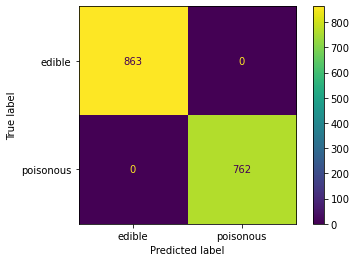

In [262]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

pipe_lr.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(
    pipe_lr, X_test, y_test, display_labels=["edible", "poisonous"]
)


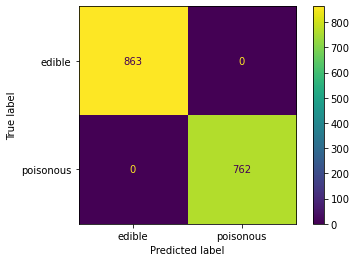

In [268]:
matrix_test = ConfusionMatrixDisplay.from_estimator(
    pipe_lr, X_test, y_test, display_labels=["edible", "poisonous"]
)


/Users/dongxiaoli/opt/miniconda3/envs/mushroom/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


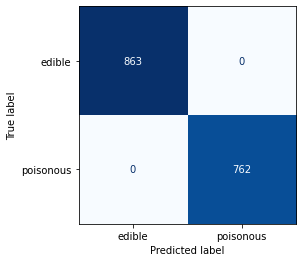

In [273]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

matrix_test = plot_confusion_matrix(
    pipe_lr,
    X_test,
    y_test,
    display_labels=["edible", "poisonous"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
);

In [274]:
matrix_test.save('matrix_test.png', format='png')

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'save'

In [277]:
preds = pipe_lr.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, preds).ravel()


In [278]:
TN

863

In [279]:
FP

0

In [280]:
TP

762

In [283]:
d = {'edible': [TN,FN], 'poisonous': [FP, TP]}
df = pd.DataFrame(data=d, index={'edible', 'poisonous'})

In [282]:
df

,edible,poisonous
edible,863,0
poisonous,0,762


In [270]:
confusion_matrix(y_test, cross_val_predict(pipe_lr, X_test, y_test))

array([[862,   1],
       [  3, 759]])

In [269]:
matrix_test

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

pipe_svc = make_pipeline(preprocessor_from_joblib, SVC(random_state=123))

pipe_lr = make_pipeline(
    preprocessor_from_joblib, LogisticRegression(max_iter=1000, random_state=123)
)

In [286]:
print(
    classification_report(
        y_test, pipe_lr.predict(X_test), target_names=["e", "p"]
    )
)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       863
           p       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



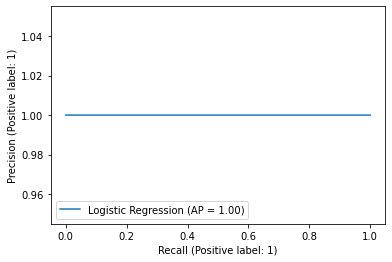

In [259]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(pipe_lr, X_test, y_test, name="Logistic Regression")

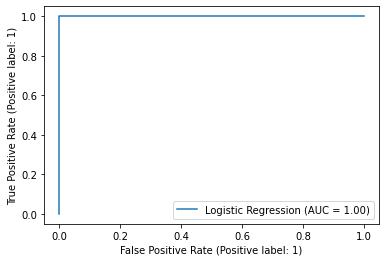

In [260]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipe_lr, X_test, y_test, name="Logistic Regression")